In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from matplotlib.colors import LogNorm, Normalize

In [22]:
def fairness(vec1):
     return np.square(np.sum(vec1))/(N*np.sum(np.square(vec1)))

In [466]:
density_vec = [25.0, 125.0, 250.0, 375.0, 500.0, 625.0]
N_vec = [25, 30, 35, 40, 45, 50]
radius_vec = [50, 100, 150, 200, 250, 300]
marker_list = ['s', 'v', 'o', '^', 'd', '*']
iter_list = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]

In [459]:
N = N_vec[0]

F_imp_all = []
D_imp_all = []
for d_max in radius_vec:
    F_improve = []
    D_improve= []
    for density in density_vec:
        F_demo = []
        F_greedy = []
        D_sum_demo = []
        D_sum_greedy = []
        for iter_val in range(10):

            file = open("./data/synthetic/greedy/S"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            D_greedy = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            file = open("./data/synthetic/demo/S"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            D_demo = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            D_mean_greedy = np.mean(D_greedy, axis=0)
            D_mean_demo = np.mean(D_demo, axis=0)

            F_greedy.append(fairness(D_mean_greedy))
            F_demo.append(fairness(D_mean_demo))

            D_sum_greedy.append(np.sum(D_mean_greedy))
            D_sum_demo.append(np.sum(D_mean_demo))

        F_improve.append(np.mean(np.subtract(F_demo, F_greedy)))
        D_improve.append(np.mean(np.subtract(D_sum_demo, D_sum_greedy)))
    F_imp_all.append(F_improve)
    D_imp_all.append(D_improve)


Text(0, 0.5, 'Datarate Improvement [Mbps]')

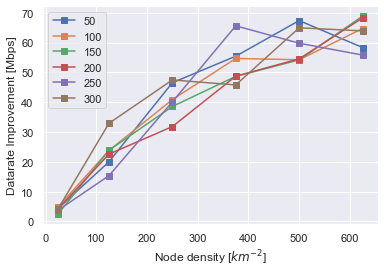

In [465]:
for k in range(6):
    plt.plot(density_vec, D_imp_all[k], marker='s')
plt.legend(radius_vec)
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Datarate Improvement [Mbps]')

Text(0, 0.5, 'Fairness Improvement')

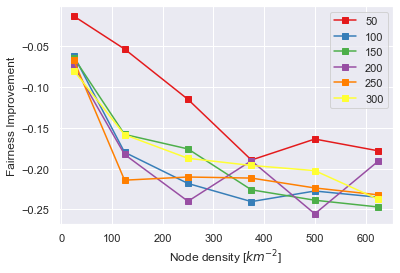

In [461]:
for k in range(6):
    plt.plot(density_vec, F_imp_all[k], marker='s')
plt.legend(radius_vec)
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Fairness Improvement')

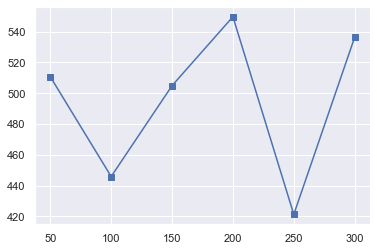

In [189]:
plt.plot(radius_vec, np.transpose(D_imp_all)[1], marker='s')

# % Improvement

In [596]:
N = N_vec[0]

F_imp_all = []
D_imp_all = []
for d_max in radius_vec:
    F_improve = []
    D_improve = []
    for density in density_vec:
        F_imp_iter = []
        D_imp_iter = []
        for iter_val in iter_list:

            file = open("./data/synthetic/greedy/D"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            D_greedy = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            file = open("./data/synthetic/demo/D"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            D_demo = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            D_mean_greedy = np.mean(D_greedy, axis=0)
            D_mean_demo = np.mean(D_demo, axis=0)

            D_sum_greedy = np.sum(D_mean_greedy)
            D_sum_demo = np.sum(D_mean_demo)
            
            
            f_imp = (fairness(D_mean_demo) - fairness(D_mean_greedy) )/fairness(D_mean_greedy)
            d_imp = (D_sum_demo - D_sum_greedy)/D_sum_greedy
            s_imp = (S_sum_demo - S_sum_greedy)/S_sum_greedy
            
            F_imp_iter.append(f_imp*100)
            D_imp_iter.append(d_imp*100)

        F_improve.append(np.mean(F_imp_iter))
        D_improve.append(np.mean(D_imp_iter))
        
    F_imp_all.append(F_improve)
    D_imp_all.append(D_improve)

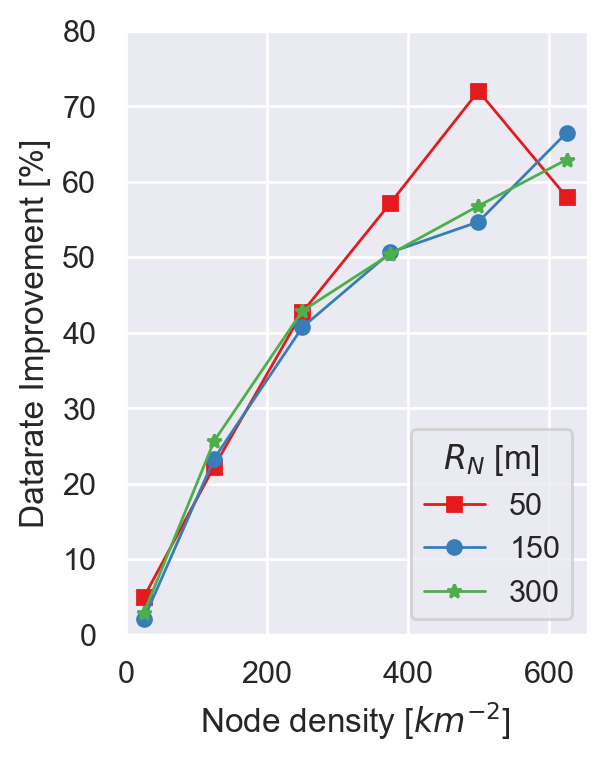

In [629]:
sns.set_palette(sns.color_palette("Set1"))

fig = plt.figure(figsize=(3,4), dpi=200)
for k in [0,2,5]:
    plt.plot(density_vec, D_imp_all[k], marker=marker_list[k], linewidth=1, markersize=5)
plt.legend([50, 150, 300], title='$R_N$ [m]', ncol=1, loc='lower right')
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Datarate Improvement [%]')
plt.ylim([0,80])
plt.savefig('./results/D_density_25.pdf', dpi=300)

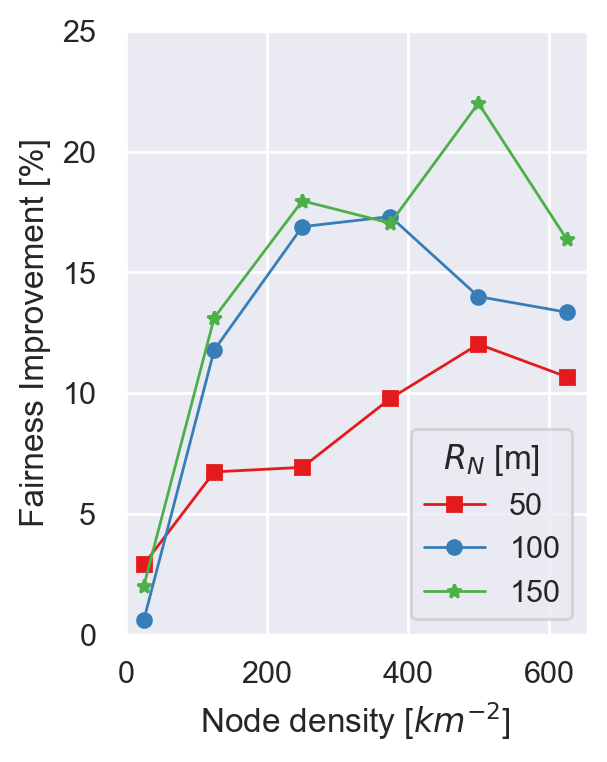

In [630]:
fig = plt.figure(figsize=(3,4), dpi=200)
for k in [0,2,5]:
    plt.plot(density_vec, F_imp_all[k], marker=marker_list[k], linewidth=1, markersize=5)
plt.legend(radius_vec, title='$R_N$ [m]', ncol=1, loc='lower right')
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Fairness Improvement [%]')
plt.ylim([0, 25])
plt.savefig('./results/F_density_25.pdf', dpi=300)

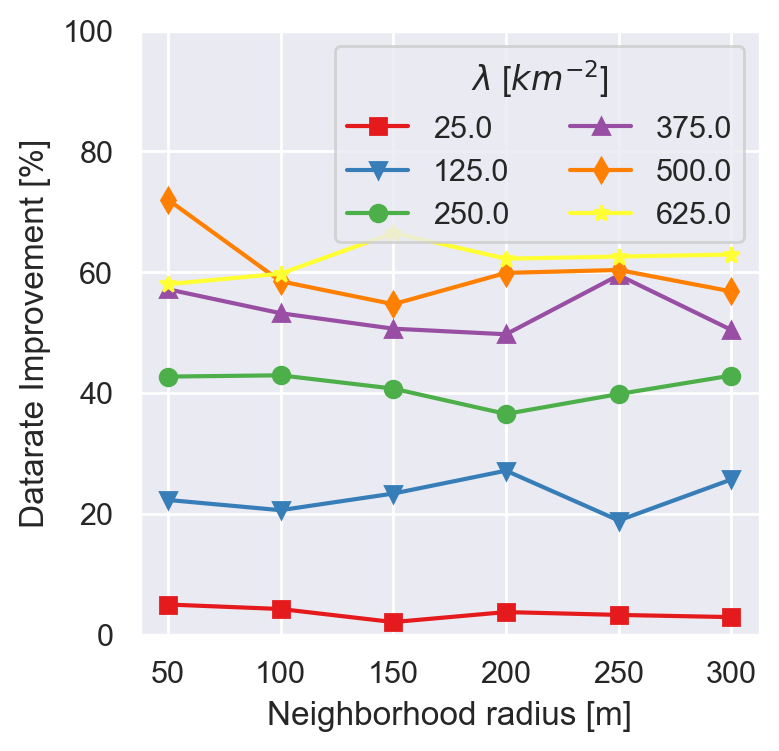

In [395]:
fig = plt.figure(figsize=(4,4), dpi=200)
for k in range(6):
    plt.plot(radius_vec, np.transpose(D_imp_all)[k], marker=marker_list[k])
plt.ylim([0,100])
plt.legend(density_vec, title='$\lambda$ [$km^{-2}$]', ncol=2, loc='upper right')
plt.xlabel('Neighborhood radius [m]')
plt.ylabel('Datarate Improvement [%]')
plt.savefig('./results/D_radius_25.pdf', dpi=300)

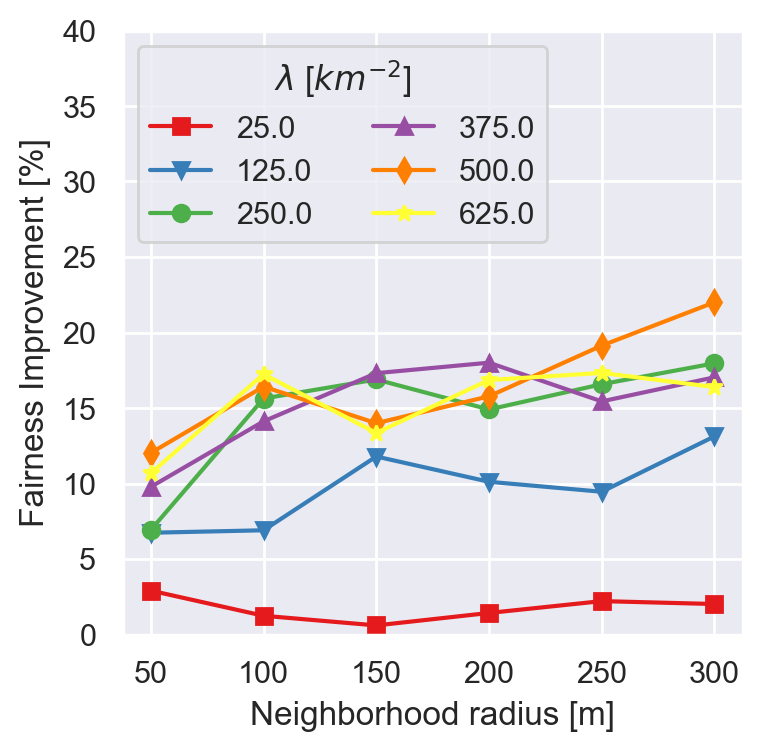

In [394]:
fig = plt.figure(figsize=(4,4), dpi=200)
for k in range(6):
    plt.plot(radius_vec, np.transpose(F_imp_all)[k], marker=marker_list[k])
plt.ylim([0,40])
plt.legend(density_vec, title='$\lambda$ [$km^{-2}$]', ncol=2, loc='upper left')
plt.xlabel('Neighborhood radius [m]')
plt.ylabel('Fairness Improvement [%]')
plt.savefig('./results/F_radius_25.pdf', dpi=300)

In [183]:
col = 21
row = 20

i = col
j = row

file = open("./data/datarates/gredy_"+str(i)+"_"+str(j)+".csv")
dat_greedy = np.mean(np.loadtxt(file, delimiter=","), axis=1)
file.close()

file = open("./data/datarates/demo_"+str(i)+"_"+str(j)+".csv")
dat_demo = np.mean(np.loadtxt(file, delimiter=","),axis=1)
file.close()

print(fairness(dat_greedy))
print(fairness(dat_demo))

0.8486535175837497
0.9207039277214897


In [283]:
N_vec = [10, 20, 30, 40, 50]

density = 250.0
d_max = 200

F_improve = []
D_improve = []

D_greedy_all = []
D_demo_all = []

F_greedy_all = []
F_demo_all = []
for N in N_vec:
    F_imp_iter = []
    D_imp_iter = []
    
    D_iter_greedy = []
    D_iter_demo = []
    
    F_iter_greedy = []
    F_iter_demo = []
    for iter_val in range(10):

        file = open("./data/synthetic/greedy/D"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
        D_greedy = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
        file.close()

        file = open("./data/synthetic/demo/D"+ \
                    '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
        D_demo = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
        file.close()

        D_mean_greedy = np.mean(D_greedy, axis=0)
        D_mean_demo = np.mean(D_demo, axis=0)

        D_sum_greedy = np.sum(D_mean_greedy)
        D_sum_demo = np.sum(D_mean_demo)
        
        D_iter_greedy.append(np.mean(D_mean_greedy))
        D_iter_demo.append(np.mean(D_mean_demo))
        
        F_iter_greedy.append(fairness(D_mean_greedy))
        F_iter_demo.append(fairness(D_mean_demo))


        f_imp = (fairness(D_mean_demo) - fairness(D_mean_greedy) )/fairness(D_mean_greedy)
        d_imp = (D_sum_demo - D_sum_greedy)/D_sum_greedy

        F_imp_iter.append(f_imp*100)
        D_imp_iter.append(d_imp*100)

    F_improve.append(np.mean(F_imp_iter))
    D_improve.append(np.mean(D_imp_iter))
    
    D_greedy_all.append(np.mean(D_iter_greedy))
    D_demo_all.append(np.mean(D_iter_demo))
    
    F_greedy_all.append(np.mean(F_iter_greedy))
    F_demo_all.append(np.mean(F_iter_demo))

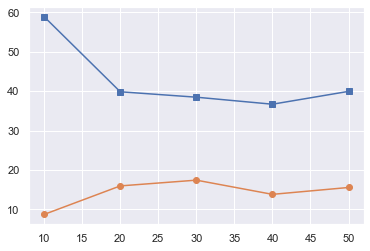

In [207]:
plt.plot(N_vec, D_improve, 's-')
plt.plot(N_vec, F_improve, 'o-')

In [284]:
import pandas as pd

n_entries = len(N_vec)
l1 = ["greedy"]*n_entries
l2 = ["democratic"]*n_entries

d = {'Nodes': N_vec + N_vec,\
     'Datarate': list(D_greedy_all) + list(D_demo_all),\
     'Scheme': l1 + l2}

f = {'Nodes': N_vec + N_vec,\
     'Datarate': list(F_greedy_all) + list(F_demo_all),\
     'Scheme': l1 + l2}

d_dat = pd.DataFrame(d)
d_fair = pd.DataFrame(f)

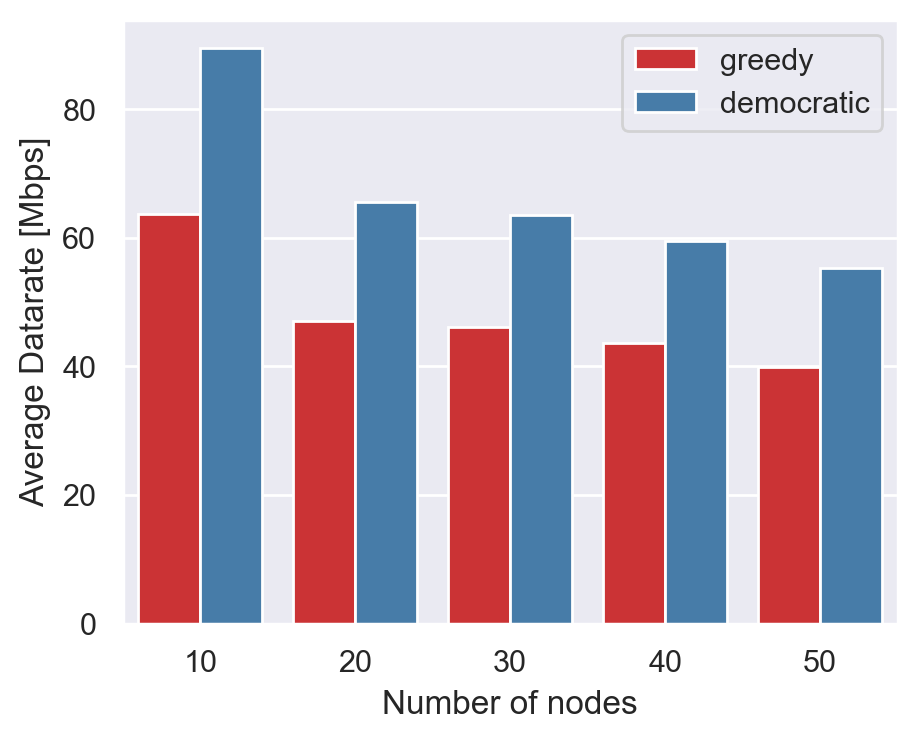

In [298]:
fig = plt.figure(figsize=(5,4), dpi=200)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.barplot(x="Nodes", y="Datarate", hue="Scheme", data=d_dat)
ax.set(xlabel='Number of nodes', ylabel='Average Datarate [Mbps]')
ax.legend().set_title('')
plt.savefig('./results/dat_vary_N_250_200.pdf', dpi=300)

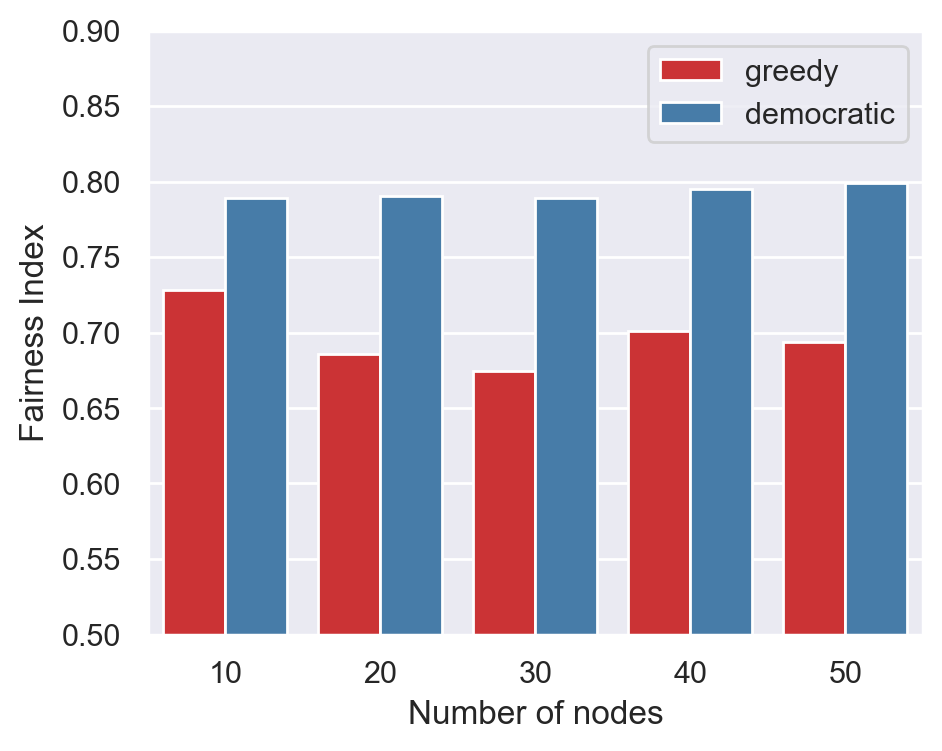

In [299]:
fig = plt.figure(figsize=(5,4), dpi=200)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.barplot(x="Nodes", y="Datarate", hue="Scheme", data=d_fair)
ax.set(xlabel='Number of nodes', ylabel='Fairness Index')
ax.legend().set_title('')
plt.ylim(0.5, 0.9)
plt.savefig('./results/fair_vary_N_250_200.pdf', dpi=300)

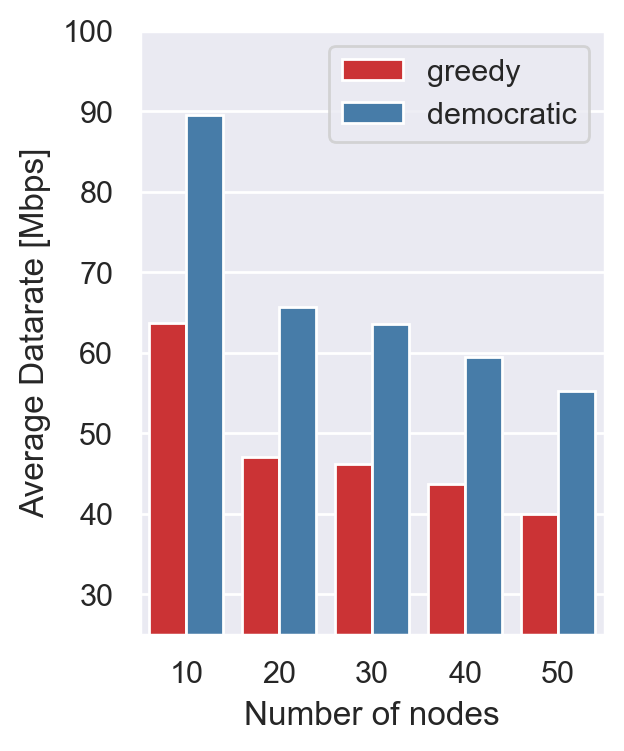

In [631]:
fig = plt.figure(figsize=(3,4), dpi=200)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.barplot(x="Nodes", y="Datarate", hue="Scheme", data=d_dat)
ax.set(xlabel='Number of nodes', ylabel='Average Datarate [Mbps]')
ax.legend().set_title('')
plt.ylim(25, 100)
plt.savefig('./results/dat_vary_N_250_200.pdf', dpi=300)

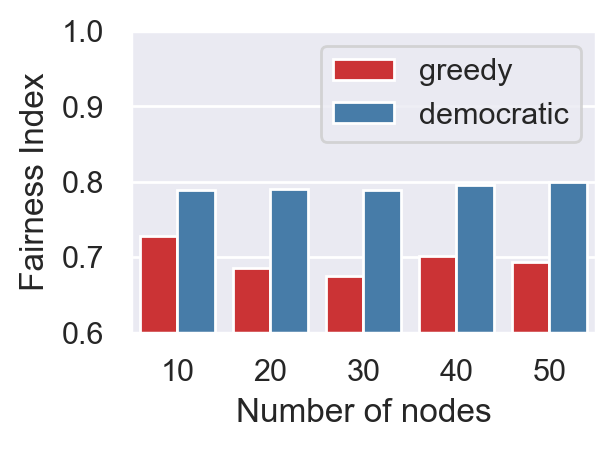

In [520]:
fig = plt.figure(figsize=(3,2), dpi=200)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.barplot(x="Nodes", y="Datarate", hue="Scheme", data=d_fair)
ax.set(xlabel='Number of nodes', ylabel='Fairness Index')
ax.legend().set_title('')
plt.ylim(0.6, 1)
plt.savefig('./results/fair_vary_N_250_200.pdf', dpi=300)

In [301]:
col = 21
row = 20

i = col
j = row

file = open("./data/datarates/gredy_"+str(i)+"_"+str(j)+".csv")
G_ij = np.loadtxt(file, delimiter=",")
file.close()

file = open("./data/datarates/demo_"+str(i)+"_"+str(j)+".csv")
D_ij = np.loadtxt(file, delimiter=",")
file.close()

N_nodes = len(D_ij)
print(N_nodes)

29


In [306]:
node_ids = list(range(1,30))

l1 = ["greedy"]*N_nodes*100
l2 = ["democratic"]*N_nodes*100

d_ = {'Nodes': node_ids*200,\
     'Datarate': list(np.reshape(G_ij, N_nodes*100)) + list(np.reshape(D_ij, N_nodes*100)),\
     'Scheme': l1 + l2}

d_29 = pd.DataFrame(d_)

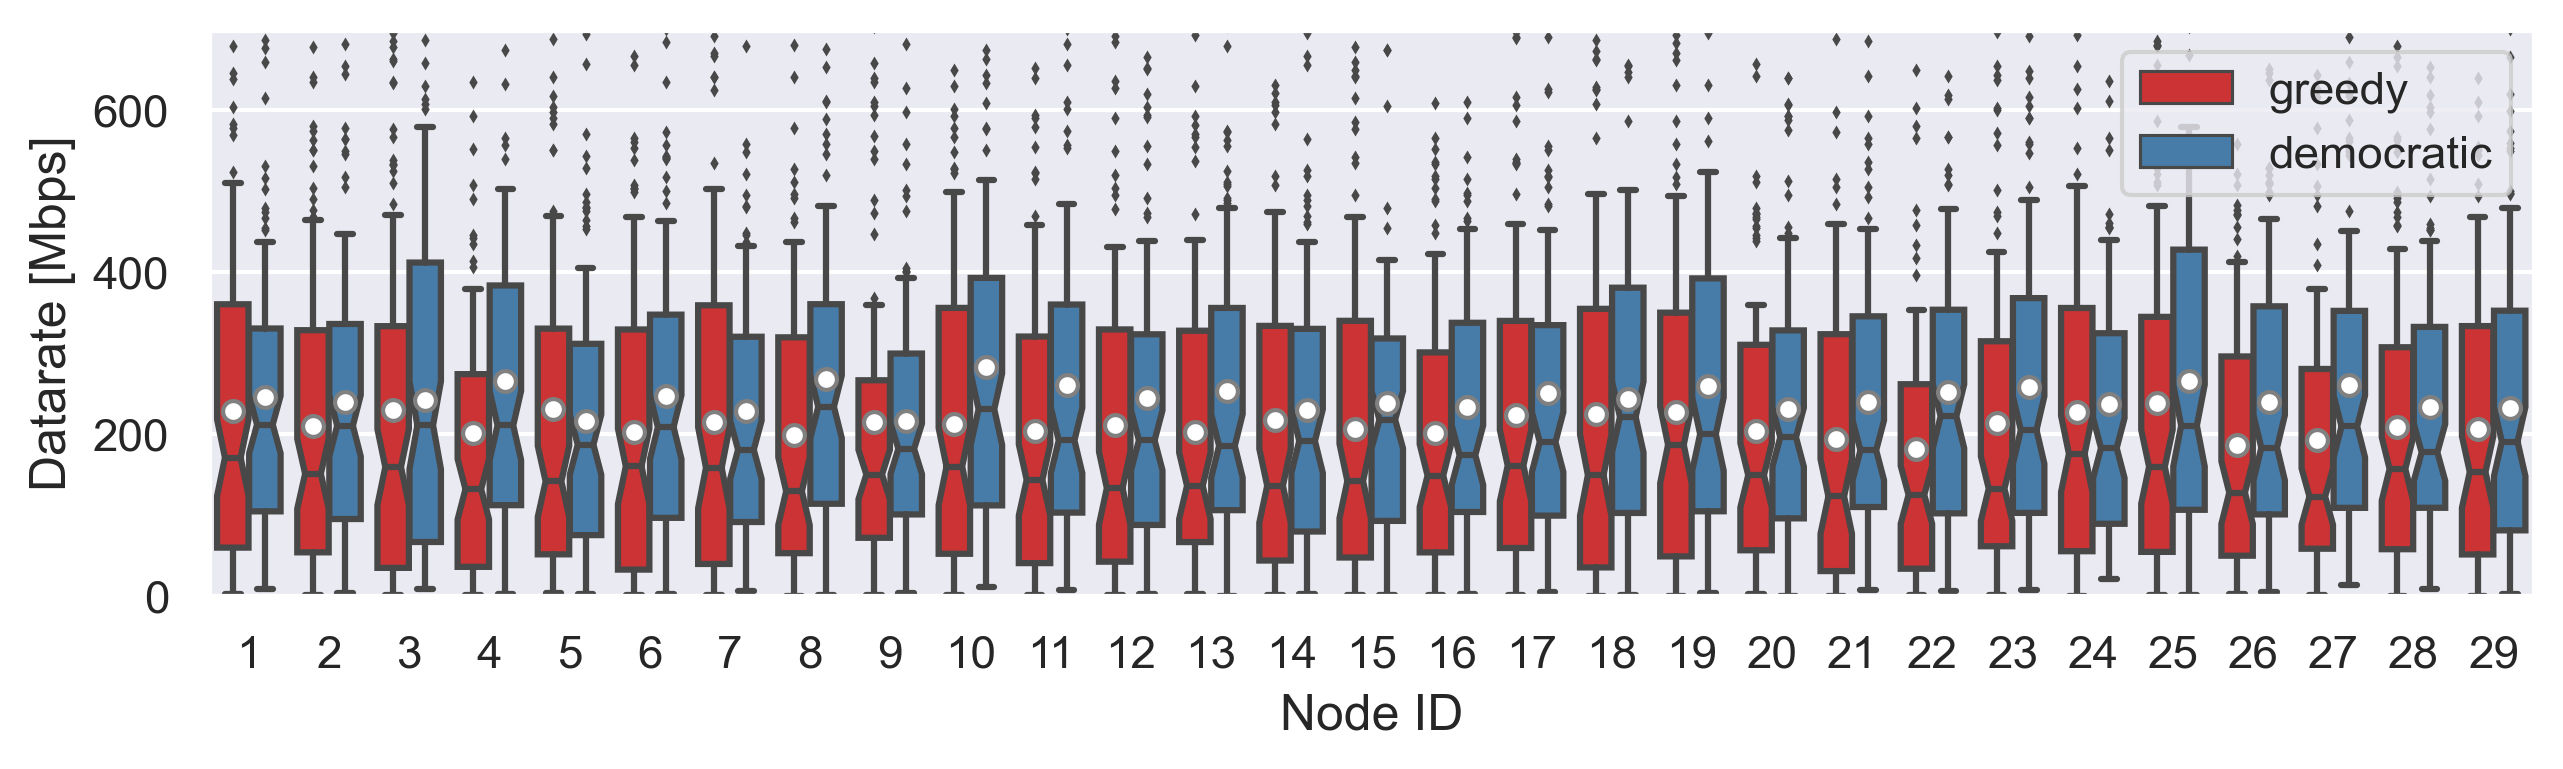

In [429]:
fig = plt.figure(figsize=(10,2.5), dpi=300)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.boxplot(x = 'Nodes', y = 'Datarate', hue='Scheme', data = d_29,\
                 notch=True, linewidth=1.5, fliersize=1, whis=0.5, showmeans=True,\
                meanprops={"marker": "o",
                       "markeredgecolor": "gray",
                           "markerfacecolor": "white",
                           "markersize": "5"})
ax.set(xlabel='Node ID', ylabel='Datarate [Mbps]')
ax.legend().set_title('')
plt.ylim(0, 700)
plt.legend(loc='upper right')
plt.savefig('./results/boxplot_29.pdf', dpi=300)

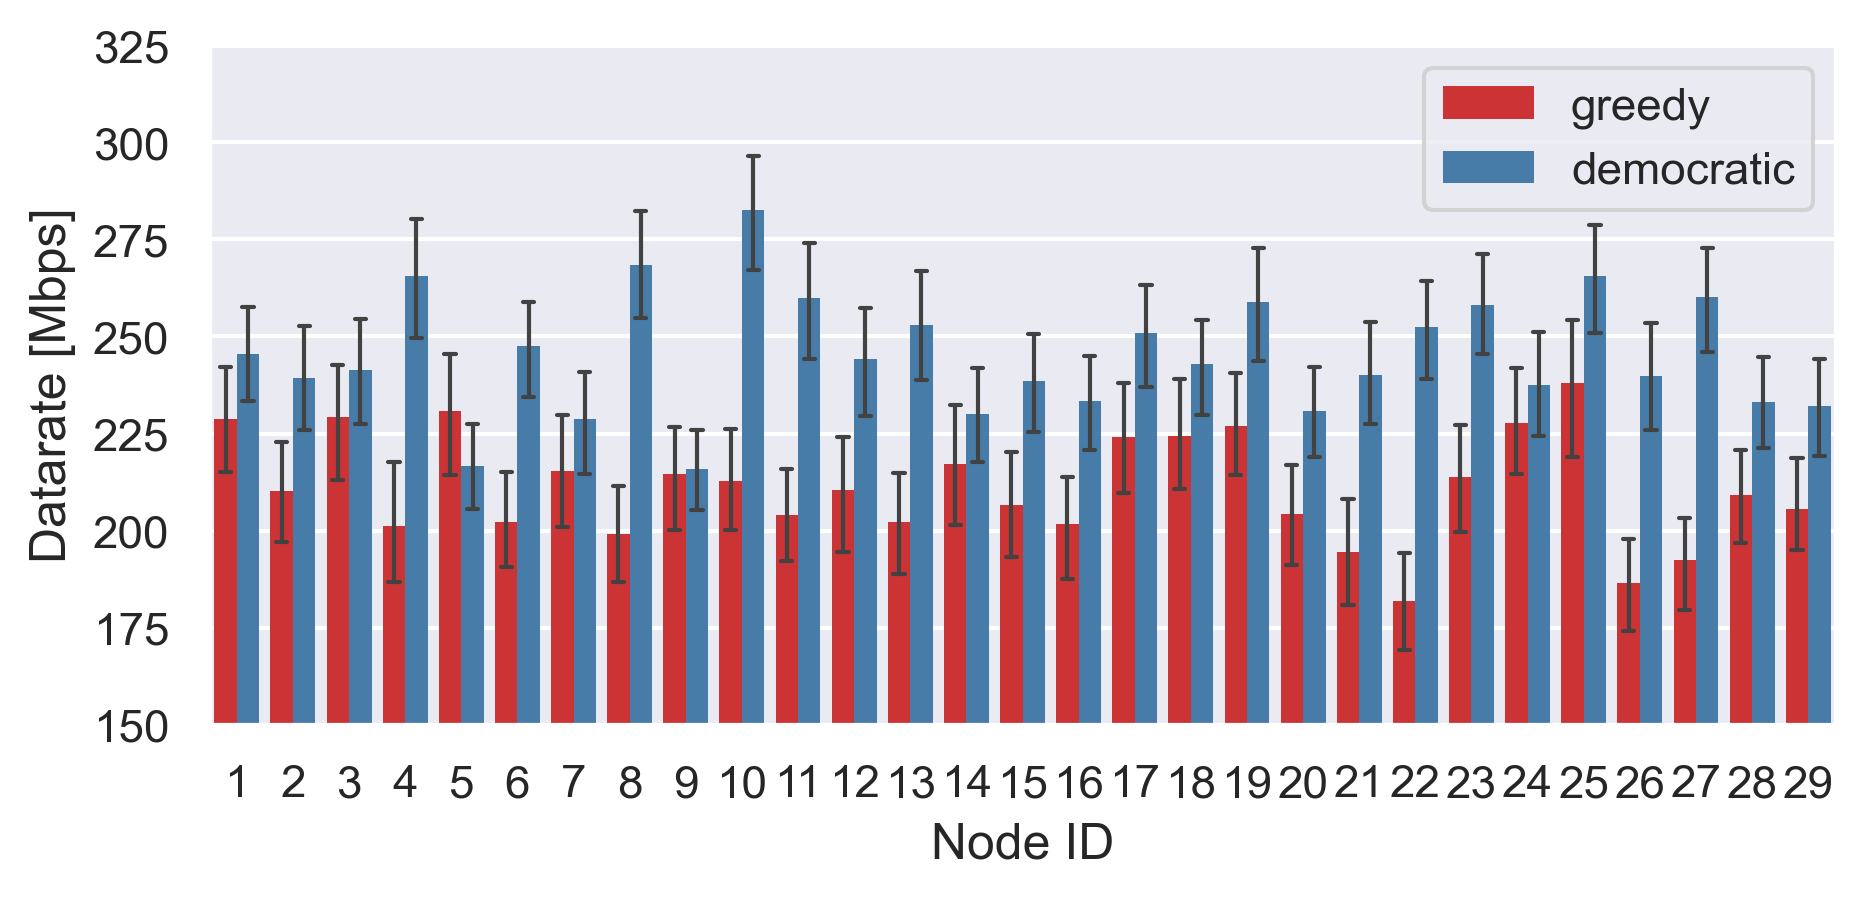

In [451]:
fig = plt.figure(figsize=(7,3), dpi=300)
sns.set_palette(sns.color_palette("Set1"))
ax = sns.barplot(x = 'Nodes', y = 'Datarate', hue='Scheme', data = d_29, errwidth=1, linewidth=0, capsize=0.2, ci=50)
ax.set(xlabel='Node ID', ylabel='Datarate [Mbps]')
ax.legend().set_title('')
plt.ylim(150, 325)
plt.legend(loc='upper right')
plt.savefig('./results/boxplot_29.pdf', dpi=300)

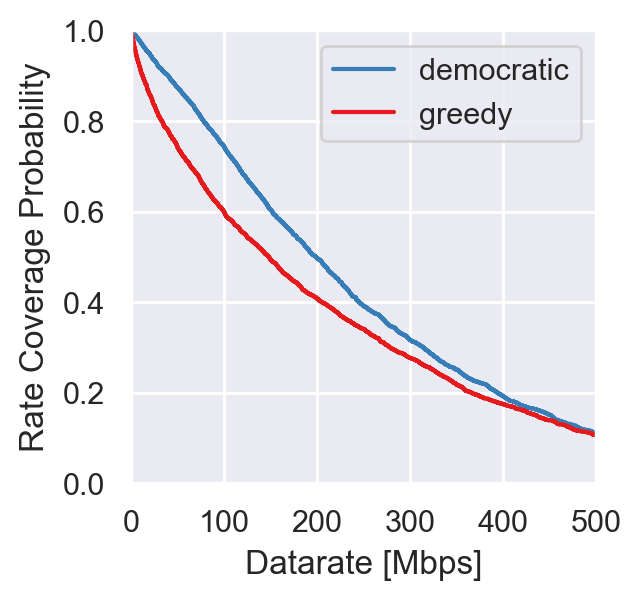

In [453]:
fig = plt.figure(figsize=(3,3), dpi=200)
ax = sns.ecdfplot(data=d_29, x="Datarate", hue="Scheme", complementary=True)
ax.legend(['democratic', 'greedy']).set_title('')
ax.set(ylabel='Rate Coverage Probability', xlabel='Datarate [Mbps]')
plt.xlim(0, 500)
plt.savefig('./results/cdf_29.pdf', dpi=300)


In [621]:
N = N_vec[0]

S_demo_all = []
S_greedy_all = []

for d_max in radius_vec:
    S_dem_vec= []
    S_gre_vec= []
    for density in density_vec:
        S_sum_demo = []
        S_sum_greedy = []
        for iter_val in range(10):

            file = open("./data/synthetic/greedy/S"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            S_greedy = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            file = open("./data/synthetic/demo/S"+ \
                        '_'.join(str(a) for a in [N, int(density), int(d_max), iter_val]) + ".csv",)
            S_demo = np.transpose(np.nan_to_num(np.loadtxt(file, delimiter=",")))
            file.close()

            S_mean_greedy = np.mean(S_greedy, axis=0)
            S_mean_demo = np.mean(S_demo, axis=0)

            S_sum_greedy.append(np.mean(S_mean_greedy))
            S_sum_demo.append(np.mean(S_mean_demo))

        S_dem_vec.append(np.mean(S_sum_demo))
        S_gre_vec.append(np.mean(S_sum_greedy))
        
    S_demo_all.append(S_dem_vec)
    S_greedy_all.append(S_gre_vec)


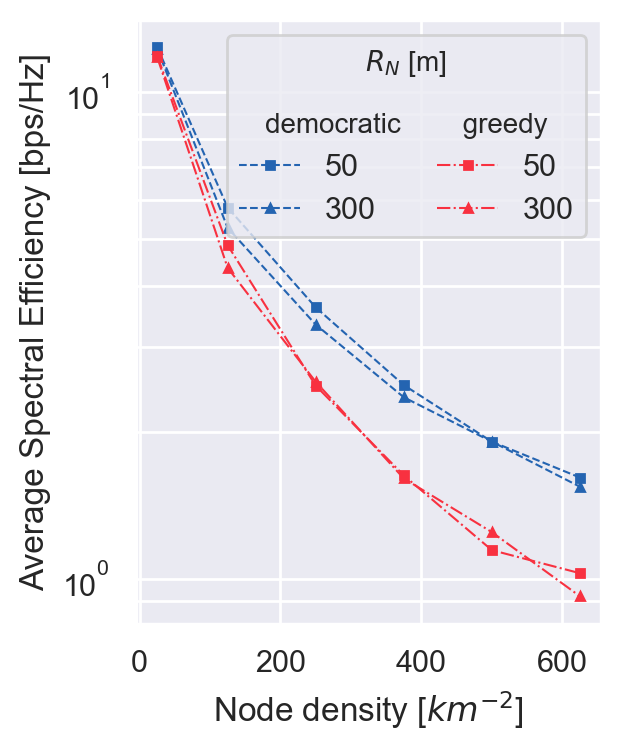

In [624]:
fig = plt.figure(figsize=(3,4), dpi=200)
sns.set_palette(sns.color_palette("tab10"))

for k in range(0,6,3):
    plt.semilogy(density_vec, D_demo_all[k], marker=marker_list[k], linestyle='--', linewidth=0.75, markersize=3, color='#2464B1')
for k in range(0,6,3):
    plt.semilogy(density_vec, D_greedy_all[k], marker= marker_list[k], linestyle='-.', linewidth=0.75, markersize=3, color='#F83140')
    
lg = plt.legend([50, 300]*2, ncol=2, title="             $R_N$ [m] \n\ndemocratic        greedy")
plt.setp(lg.get_title(),fontsize=10)
plt.grid(True,which="minor",ls="-",c='white')
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Average Spectral Efficiency [bps/Hz]')
plt.savefig('./results/SE_25.pdf', dpi=300)

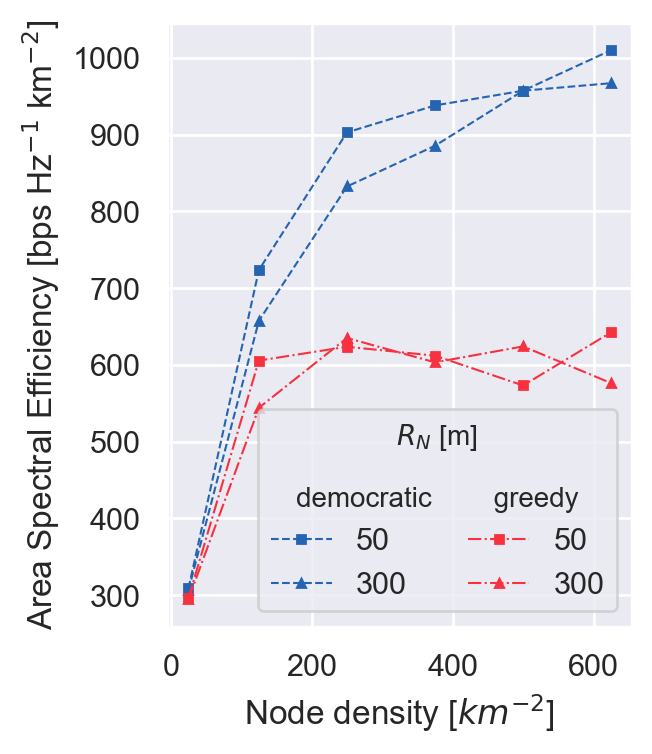

In [625]:
fig = plt.figure(figsize=(3,4), dpi=200)
sns.set_palette(sns.color_palette("tab10"))

for k in range(0,6,3):
    plt.plot(density_vec, np.array(D_demo_all[k])*np.array(density_vec), marker=marker_list[k], linestyle='--', linewidth=0.75, markersize=3, color='#2464B1')
for k in range(0,6,3):
    plt.plot(density_vec, np.array(D_greedy_all[k])*np.array(density_vec), marker= marker_list[k], linestyle='-.', linewidth=0.75, markersize=3, color='#F83140')
    
lg = plt.legend([50, 300]*2, ncol=2, title="             $R_N$ [m] \n\ndemocratic        greedy")
plt.setp(lg.get_title(),fontsize=10)
plt.grid(True,which="minor",ls="-",c='white')
plt.xlabel('Node density [$km^{-2}$]')
plt.ylabel('Area Spectral Efficiency [bps Hz$^{-1}$ km$^{-2}$]')
plt.savefig('./results/ASE_25.pdf', dpi=300)

array([306.58338288, 657.56600025, 832.51414888, 885.60465686,
       957.27523743, 967.10952612])